In [10]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-secant-iqi)

Here we look for a root of $x+\cos(10x)$ that is close to 1.

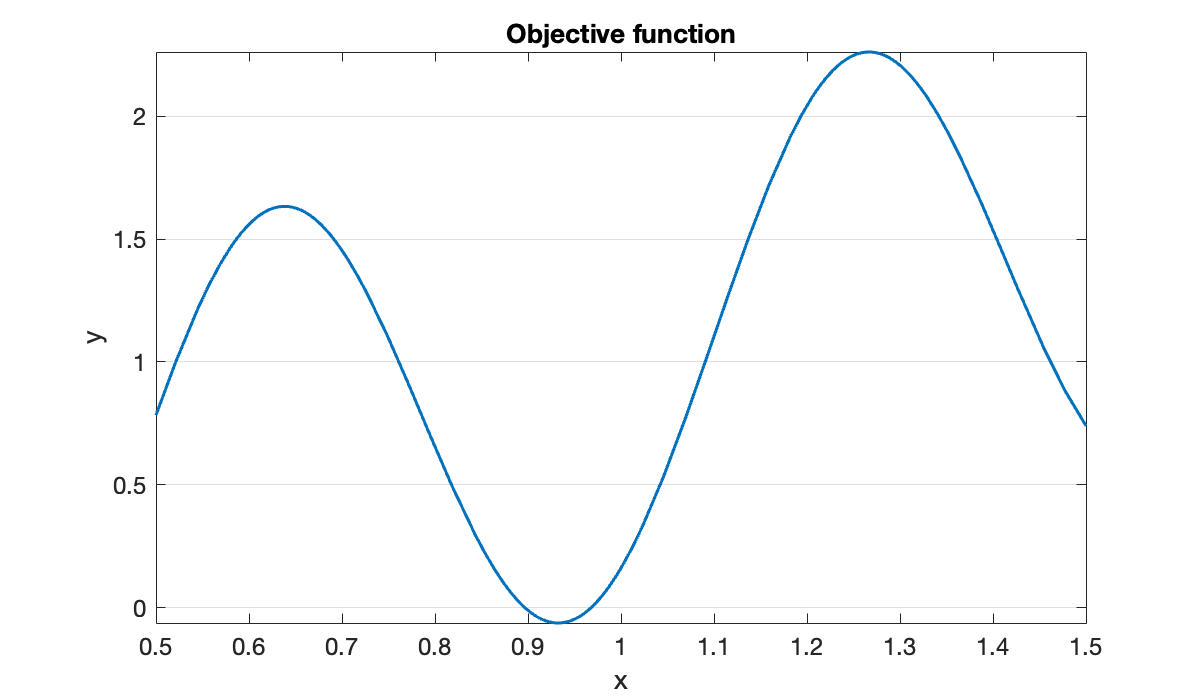

r = 0.9679

In [11]:
f = @(x) x + cos(10 * x);
interval = [0.5, 1.5];
clf, fplot(f, interval)
set(gca, 'ygrid', 'on'), axis(axis)   
title('Objective function')    
xlabel('x'), ylabel('y')    
r = fzero(f, 1)

We choose three values to get the iteration started.

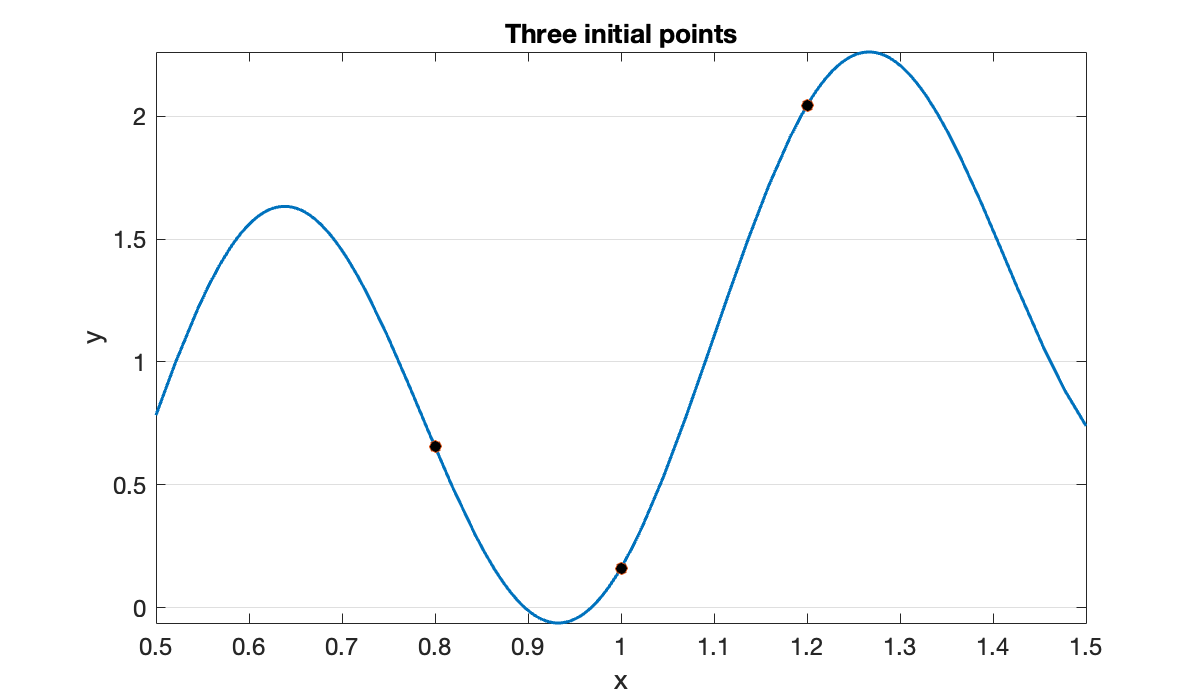

In [12]:
x = [0.8, 1.2, 1]';
y = f(x);
hold on, scatter(x, y)
title('Three initial points')    

If we were using forward interpolation, we would ask for the polynomial interpolant of $y$ as a function of $x$. But that parabola has no real roots.

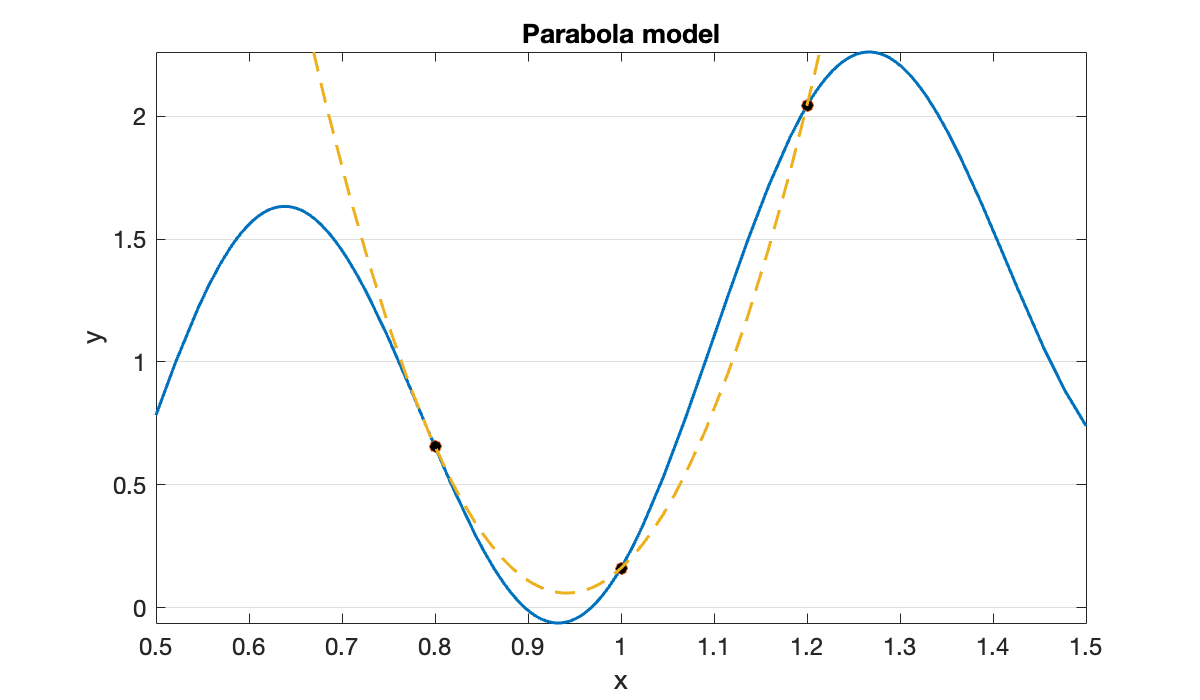

In [13]:
c = polyfit(x, y, 2);    % coefficients of interpolant
q = @(x) polyval(c, x);
fplot(q, interval, '--')
title('Parabola model')     

To do inverse interpolation, we swap the roles of $x$ and $y$ in the interpolation.

```{tip}
:class: dropdown
By giving two functions in the `fplot` call, we get the parametric plot $(q(y),y)$ as a function of $y$.
```

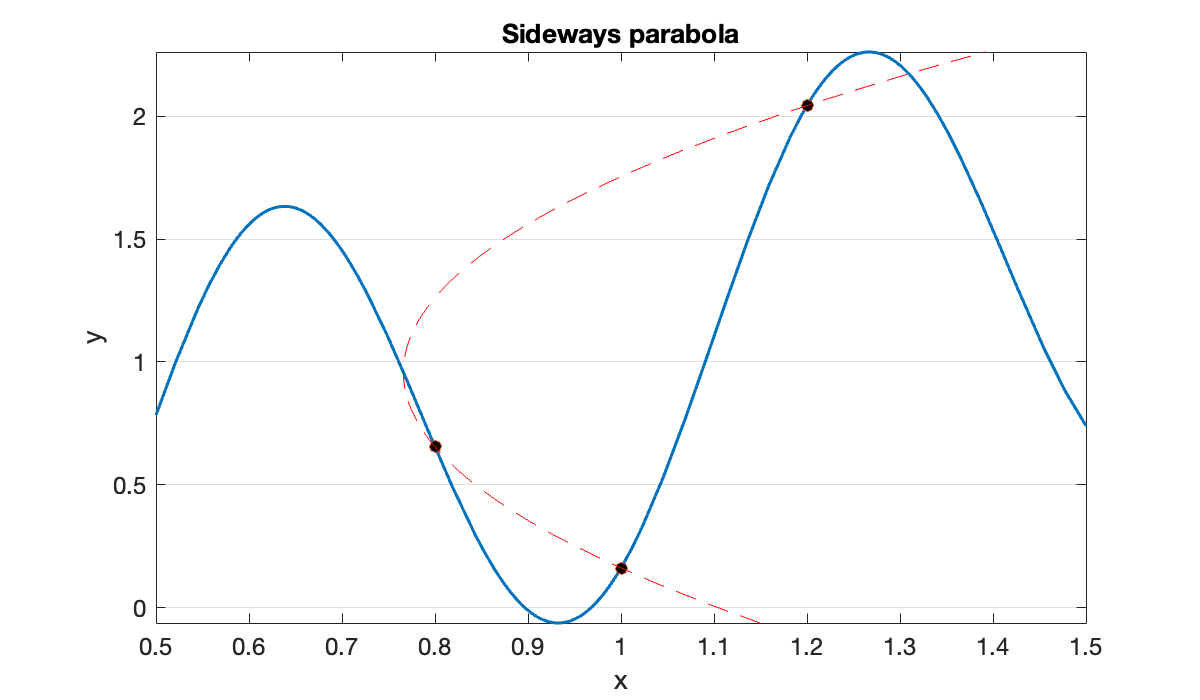

In [14]:
cla, fplot(f, interval)
scatter(x, y)     
c = polyfit(y, x, 2);    % coefficients of interpolating polynomial
q = @(y) polyval(c, y);
fplot(q, @(y) y, ylim, 'r--')    % plot x=q(y), y=y
title('Sideways parabola')    

We seek the value of $x$ that makes $y$ zero. This means evaluating $q$ at zero.

In [15]:
x = [x; q(0)];
y = [y; f(x(end))]

y = 4×1 double
    0.6545
    2.0439
    0.1609
    1.1482

We repeat the process a few more times.

In [16]:
for k = 4:8
    c = polyfit(y(k-2:k), x(k-2:k), 2);
    x(k+1) = polyval(c, 0);
    y(k+1) = f(x(k+1));
end
disp('final residual:')
y(end)

final residual:


ans = 1.2084e-08

Here is the sequence of errors.

In [17]:
format short e
err = x - r

err = 9×1 double
  -1.6789e-01
   2.3211e-01
   3.2112e-02
   1.3609e-01
   1.5347e-02
   3.2683e-03
   4.6174e-04
   6.2958e-06
   3.4390e-09

The convergence is probably superlinear:

In [18]:
logerr = log(abs(err));
ratios = logerr(2:end) ./ logerr(1:end-1)

ratios = 8×1 double
   8.1848e-01
   2.3543e+00
   5.8002e-01
   2.0943e+00
   1.3703e+00
   1.3419e+00
   1.5592e+00
   1.6273e+00